In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
from sklearn.model_selection import train_test_split

X = df[['feature1', 'feature2']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 2) (300, 2) (700,) (300,)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Alternative: StandardScaler?
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Dense(2))
model.add(keras.layers.Dense(2))
model.add(keras.layers.Dense(2))

model.add(keras.layers.Dense(1)) # Output layer
model.compile(optimizer='rmsprop', loss='mse')

In [10]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256935.7969
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256767.0469
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256621.5781
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256480.0156
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256341.9375
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256200.6562
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256049.5781
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255881.6250
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255692.1406
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255478.5312
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255237.5938
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [11]:
model.history.history

{'loss': [256935.796875,
  256767.046875,
  256621.578125,
  256480.015625,
  256341.9375,
  256200.65625,
  256049.578125,
  255881.625,
  255692.140625,
  255478.53125,
  255237.59375,
  254969.09375,
  254670.484375,
  254339.390625,
  253972.34375,
  253567.796875,
  253124.734375,
  252637.296875,
  252104.09375,
  251522.703125,
  250891.6875,
  250206.71875,
  249462.609375,
  248662.453125,
  247797.0,
  246864.75,
  245863.34375,
  244788.40625,
  243638.828125,
  242404.609375,
  241093.625,
  239698.671875,
  238212.6875,
  236637.09375,
  234966.96875,
  233189.9375,
  231325.09375,
  229347.296875,
  227252.609375,
  225058.328125,
  222746.71875,
  220327.9375,
  217786.453125,
  215132.9375,
  212346.328125,
  209431.40625,
  206385.09375,
  203223.390625,
  199939.796875,
  196506.015625,
  192945.171875,
  189263.015625,
  185456.140625,
  181485.4375,
  177394.0625,
  173208.734375,
  168876.484375,
  164427.109375,
  159844.71875,
  155138.78125,
  150301.859375,
  1

In [12]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Training Loss per Epoch')

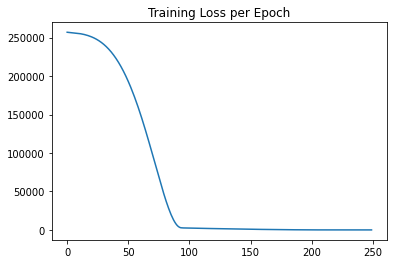

In [13]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title('Training Loss per Epoch')

In [14]:
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

print(training_score, test_score)

23.779891967773438 25.38289451599121


In [24]:
test_predictions = model.predict(X_test)
test_predictions.shape

10/10 [==============================] - 0s 2ms/step


(300, 1)

In [25]:
pred_df = pd.DataFrame(y_test, columns=['Test Y'])

In [26]:
test_predictions = pd.Series(test_predictions.reshape(300, ))

pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test Y', "Model Predictions"]

pred_df.head()

,Test Y,Model Predictions
0,402.296319,405.767822
1,624.156198,624.153687
2,582.455066,592.709045
3,578.588606,572.847534
4,371.224104,367.145691


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

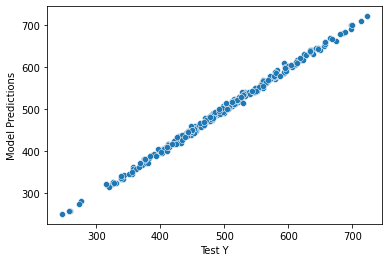

In [27]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

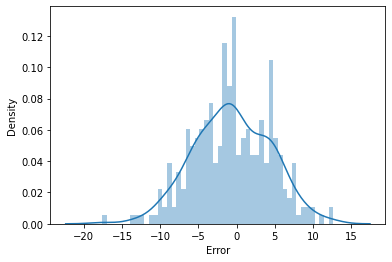

In [29]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'], bins=50)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])

4.056789832911353

In [31]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.382895784852227

In [33]:
test_score**0.5

5.038143955465268

In [34]:
# New data
new_gem = [[998, 1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

1/1 [==============================] - 0s 24ms/step


array([[420.24347]], dtype=float32)

In [35]:
from keras.models import load_model
model.save('my_model.h5')

In [36]:
later_model = load_model('my_model.h5')
later_model.predict(new_gem)

1/1 [==============================] - 0s 115ms/step


array([[420.24347]], dtype=float32)